In [105]:
# Examining the relationship between Salaries and Batting Average
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

directory = '/Users/JoeK/Documents/Udacity/Data Analysis/core/'
batting_df = pd.read_csv(directory + 'Batting.csv')
salaries_df = pd.read_csv(directory +'Salaries.csv')

batting_df.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118.0,30.0,32.0,6.0,...,13.0,8.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137.0,28.0,40.0,4.0,...,19.0,3.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133.0,28.0,44.0,10.0,...,27.0,1.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120.0,29.0,39.0,11.0,...,16.0,6.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN


In [106]:
# merge batting_df and salaries_df based on 'playerID'; excluding players that appear on both
combined_df = batting_df.merge(salaries_df, on='playerID', how='inner')
combined_df.head()

,playerID,yearID_x,stint,teamID_x,lgID_x,G,AB,R,H,2B,...,SO,IBB,HBP,SH,SF,GIDP,yearID_y,teamID_y,lgID_y,salary
0,lawrebr01,1954,1,SLN,NL,35,53.0,2.0,10.0,0.0,...,15.0,NaN,1.0,1.0,0.0,0.0,2007,COL,NL,500000
1,lawrebr01,1955,1,SLN,NL,46,21.0,1.0,2.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,2007,COL,NL,500000
2,lawrebr01,1956,1,CIN,NL,49,70.0,4.0,11.0,2.0,...,28.0,0.0,1.0,6.0,2.0,2.0,2007,COL,NL,500000
3,lawrebr01,1957,1,CIN,NL,49,82.0,4.0,14.0,2.0,...,26.0,0.0,0.0,6.0,0.0,4.0,2007,COL,NL,500000
4,lawrebr01,1958,1,CIN,NL,46,53.0,1.0,6.0,0.0,...,13.0,0.0,0.0,1.0,2.0,1.0,2007,COL,NL,500000


In [107]:
# groupby 'salary'
grouped_mean_data = combined_df.groupby(combined_df['salary'], as_index=True).mean()
grouped_mean_data.head()

,yearID_x,stint,G,AB,R,H,2B,3B,HR,RBI,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,yearID_y,salary
salary,,,,,,,,,,,,,,,,,,,,,
0,1989.923077,1.076923,73.384615,208.384615,27.846154,60.076923,10.923077,1.615385,2.461538,20.461538,...,2.923077,24.461538,23.692308,1.538462,0.846154,1.692308,1.153846,4.307692,1993.461538,0.0
10900,1995.444444,1.111111,20.111111,37.333333,4.666667,7.555556,1.333333,0.333333,0.666667,4.000000,...,0.222222,6.222222,10.666667,0.666667,0.111111,0.444444,0.444444,1.333333,1993.000000,10900.0
50000,1988.961538,1.153846,24.500000,9.578947,0.473684,1.052632,0.157895,0.000000,0.052632,0.368421,...,0.000000,0.157895,3.842105,0.000000,0.000000,0.473684,0.000000,0.157895,1996.076923,50000.0
60000,1989.315036,1.076372,59.186158,178.465534,24.861139,46.565435,8.359640,1.167832,5.562438,23.149850,...,1.837163,18.942058,31.695305,2.277722,1.183816,1.961039,1.573427,3.548452,1985.840891,60000.0
61500,1987.714286,1.142857,13.571429,19.200000,0.800000,2.800000,0.400000,0.000000,0.000000,0.200000,...,0.000000,1.000000,5.400000,0.000000,0.000000,1.000000,0.000000,0.200000,1986.000000,61500.0


In [108]:
# Create new column in groups and save 'batting_avg'
def batting_avg(group):
    group['batting_avg'] = group['H'] / group['AB']
    return group

# NOTE: axis=1 to apply function across each row; because two columns are being compared, axis=1 allows
# the function to read each value in the different columns
graph_me = grouped_mean_data.apply(batting_avg, axis=1)
graph_me.head()


,yearID_x,stint,G,AB,R,H,2B,3B,HR,RBI,...,BB,SO,IBB,HBP,SH,SF,GIDP,yearID_y,salary,batting_avg
salary,,,,,,,,,,,,,,,,,,,,,
0,1989.923077,1.076923,73.384615,208.384615,27.846154,60.076923,10.923077,1.615385,2.461538,20.461538,...,24.461538,23.692308,1.538462,0.846154,1.692308,1.153846,4.307692,1993.461538,0.0,0.288298
10900,1995.444444,1.111111,20.111111,37.333333,4.666667,7.555556,1.333333,0.333333,0.666667,4.000000,...,6.222222,10.666667,0.666667,0.111111,0.444444,0.444444,1.333333,1993.000000,10900.0,0.202381
50000,1988.961538,1.153846,24.500000,9.578947,0.473684,1.052632,0.157895,0.000000,0.052632,0.368421,...,0.157895,3.842105,0.000000,0.000000,0.473684,0.000000,0.157895,1996.076923,50000.0,0.109890
60000,1989.315036,1.076372,59.186158,178.465534,24.861139,46.565435,8.359640,1.167832,5.562438,23.149850,...,18.942058,31.695305,2.277722,1.183816,1.961039,1.573427,3.548452,1985.840891,60000.0,0.260921
61500,1987.714286,1.142857,13.571429,19.200000,0.800000,2.800000,0.400000,0.000000,0.000000,0.200000,...,1.000000,5.400000,0.000000,0.000000,1.000000,0.000000,0.200000,1986.000000,61500.0,0.145833


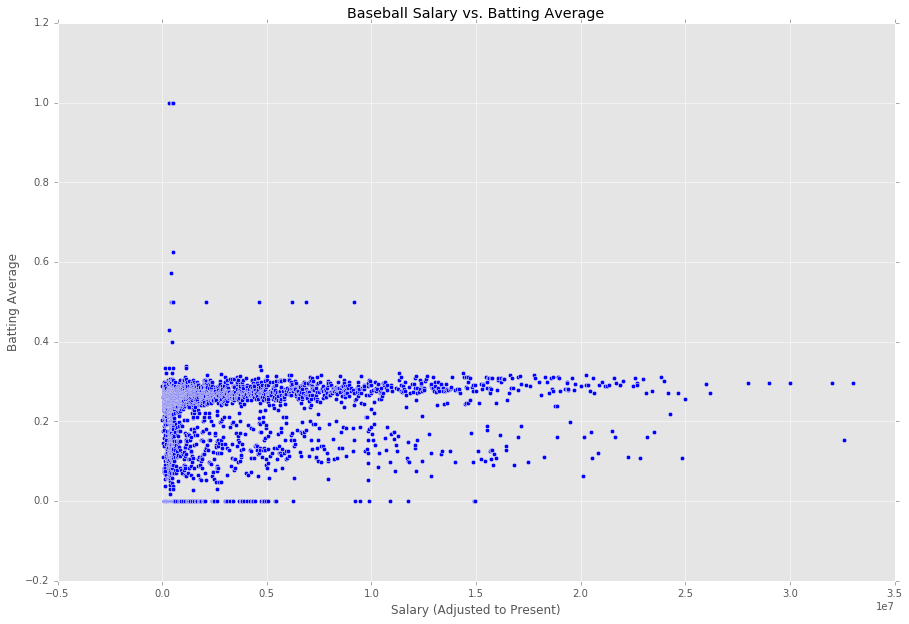

In [120]:
%matplotlib inline
plt.figure(figsize=(15,10))
plt.xlabel('Salary (Adjusted to Present)')
plt.ylabel('Batting Average')
plt.title('Baseball Salary vs. Batting Average')
# This graph shows outliers, next section filters outliers out
plt.scatter(graph_me.index, graph_me['batting_avg'])

In [122]:
# according to link below, requires at least 50 swings to calculate swing % at 0.7 correlation, a benchmark in baseball
# statistics
# http://www.fangraphs.com/blogs/when-samples-become-reliable/
filtered_graph_me = graph_me.loc[graph_me['AB'] > 50]
filtered_graph_me

,yearID_x,stint,G,AB,R,H,2B,3B,HR,RBI,...,BB,SO,IBB,HBP,SH,SF,GIDP,yearID_y,salary,batting_avg
salary,,,,,,,,,,,,,,,,,,,,,
0,1989.923077,1.076923,73.384615,208.384615,27.846154,60.076923,10.923077,1.615385,2.461538,20.461538,...,24.461538,23.692308,1.538462,0.846154,1.692308,1.153846,4.307692,1993.461538,0.0,0.288298
60000,1989.315036,1.076372,59.186158,178.465534,24.861139,46.565435,8.359640,1.167832,5.562438,23.149850,...,18.942058,31.695305,2.277722,1.183816,1.961039,1.573427,3.548452,1985.840891,60000.0,0.260921
62500,1990.947326,1.081037,59.910049,186.368732,24.388397,49.749263,8.764995,1.309735,4.372665,22.401180,...,17.792527,28.297935,1.546706,1.282203,2.073746,1.600787,4.088496,1987.235818,62500.0,0.266940
63500,1992.720000,1.080000,69.780000,221.104167,24.458333,56.854167,9.958333,1.250000,6.458333,27.479167,...,12.937500,40.916667,1.625000,1.166667,1.854167,2.000000,5.833333,1987.440000,63500.0,0.257137
64500,1992.000000,1.000000,116.727273,414.000000,51.454545,111.909091,23.909091,0.909091,2.454545,35.636364,...,49.272727,37.000000,2.636364,2.727273,8.090909,3.000000,10.727273,1988.000000,64500.0,0.270312
65000,1990.149701,1.071856,49.973054,139.397306,17.562290,35.346801,6.518519,0.717172,3.973064,18.205387,...,13.434343,24.858586,1.404040,0.666667,2.060606,1.262626,2.909091,1986.940120,65000.0,0.253569
65500,1989.600000,1.000000,36.800000,84.400000,8.400000,20.000000,4.000000,0.400000,0.800000,8.200000,...,5.000000,9.800000,0.200000,0.800000,0.800000,0.200000,2.600000,1988.000000,65500.0,0.236967
66000,1987.944444,1.055556,28.277778,57.888889,4.611111,12.000000,2.055556,0.277778,0.777778,5.166667,...,4.722222,12.611111,0.500000,0.444444,0.444444,0.444444,1.944444,1986.777778,66000.0,0.207294
66500,1988.000000,1.142857,47.238095,119.761905,10.904762,30.095238,5.285714,0.428571,2.428571,14.428571,...,9.047619,13.285714,1.047619,0.809524,1.047619,1.571429,3.666667,1986.476190,66500.0,0.251292


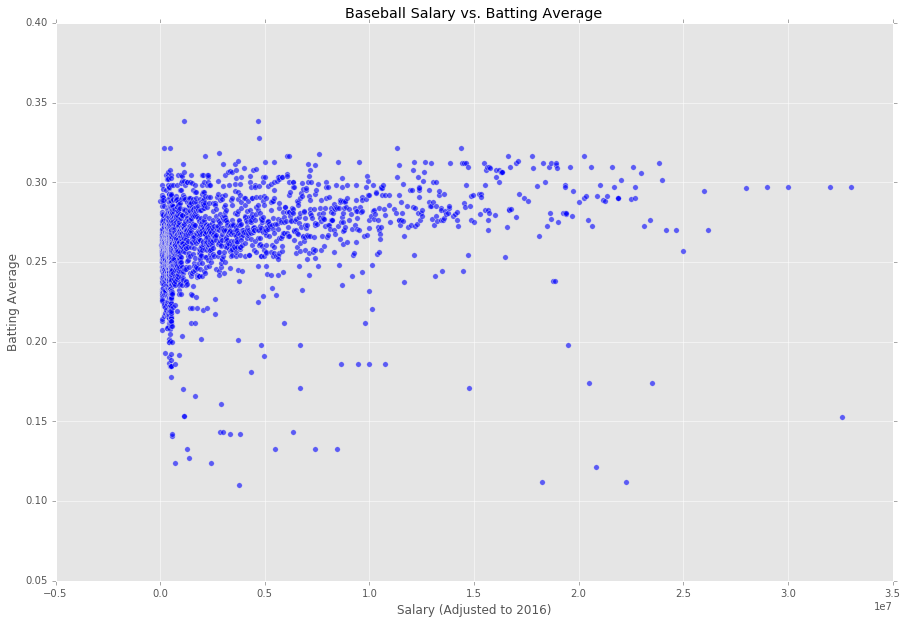

In [136]:
plt.figure(figsize=(15,10))
plt.xlabel('Salary (Adjusted to 2016)')
plt.ylabel('Batting Average')
plt.title('Baseball Salary vs. Batting Average')
plt.scatter(filtered_graph_me.index, filtered_graph_me['batting_avg'], s=30, alpha=.6)